# Bank Failure Prediction 


#What do you mean by  bank failure?
A bank failure is when a bank is unable to meet its obligations to depositors and others because it has become insolvent or too illiquid to meet its liabilities. For example, if a bank has lent out more money than it can recover from its borrowers, it may not have enough money to pay back its depositors. When this happens, the bank may be closed by a federal or state regulator .

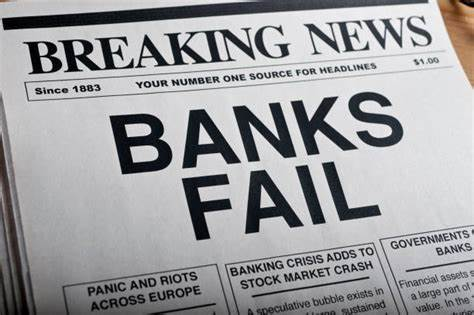

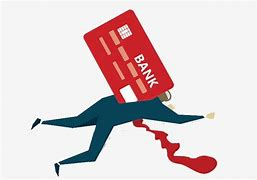

**Modeling:**

 Use the sample data to answer:
 
  • What was the biggest bank at the end of 2009? 
 
 • What trends do you observe in net chargeoffs over time?
 
  • Is there a correlation between level of profitability of a bank’s investments in securities (here measured by fair value of investments over cost basis) and bank failure? 
  
  • What are the top two predictors of bank failure? • Which banks are most likely to fail in the near future (and why)?

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.feature_selection import SelectKBest,f_classif

In [ ]:
df=pd.read_excel("/content/Bank failure data.xlsx")
df.head()

,Bank Name,Quarter,Tier One,Texas,Size,Brokered Deposits,Net Chargeoffs,Constr and Land Dev Loans,Change in Portfolio Mix,NP CRE to Assets,Volatile Liabilities to Assets,Securities,Failed during 2010Q2,Cert Number
0,Exchange Bank,2007Q4,14.90,19.36,32.852108,0.0,0.03,23.13,3.38,0.190681,20.16,99.07,No,160
1,Exchange Bank,2008Q1,14.30,20.86,33.542390,0.0,0.00,32.96,4.96,0.000000,21.23,99.45,No,160
2,Exchange Bank,2008Q2,14.15,20.89,34.140007,0.0,0.31,33.71,1.53,0.022408,19.69,97.94,No,160
3,Exchange Bank,2008Q3,14.13,18.74,34.038758,0.0,-0.02,34.99,3.80,0.147452,19.83,98.84,No,160
4,Exchange Bank,2008Q4,14.21,21.82,34.059328,0.0,1.21,37.14,3.86,0.057306,15.29,99.84,No,160


In [ ]:
df.shape

(4060, 14)

In [ ]:
df.describe()

,Tier One,Texas,Size,Brokered Deposits,Net Chargeoffs,Constr and Land Dev Loans,Change in Portfolio Mix,NP CRE to Assets,Volatile Liabilities to Assets,Securities,Cert Number
count,4060.000000,3997.000000,4060.000000,4040.000000,4054.000000,4060.000000,4060.000000,4060.000000,4060.000000,4060.000000,4060.000000
mean,15.818138,29.437163,31.120431,6.209186,1.087743,10.994961,4.912611,0.704697,22.784638,100.652315,22579.123153
std,16.759611,84.947978,14.624115,13.025505,3.312639,11.627024,5.626908,1.325783,11.762271,2.910710,18169.482027
min,-11.510000,0.000000,-6.422059,0.000000,-2.890000,0.000000,0.000000,0.000000,0.000000,80.870000,160.000000
25%,10.190000,3.310000,21.257232,0.000000,0.000000,2.260000,2.110000,0.000000,14.720000,99.870000,9420.000000
50%,12.490000,11.640000,29.022062,0.000000,0.200000,7.505000,3.580000,0.236864,21.350000,100.680000,17840.000000
75%,16.910000,26.040000,39.464289,6.730000,0.880000,15.885000,5.830000,0.818007,28.752500,101.772500,32955.000000
max,334.030000,2388.810000,104.961976,97.640000,106.350000,84.200000,100.000000,22.057423,90.030000,188.700000,91280.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4060 entries, 0 to 4059
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Bank Name                       4060 non-null   object 
 1   Quarter                         4060 non-null   object 
 2   Tier One                        4060 non-null   float64
 3   Texas                           3997 non-null   float64
 4   Size                            4060 non-null   float64
 5   Brokered Deposits               4040 non-null   float64
 6   Net Chargeoffs                  4054 non-null   float64
 7   Constr and Land Dev Loans       4060 non-null   float64
 8   Change in Portfolio Mix         4060 non-null   float64
 9   NP CRE to Assets                4060 non-null   float64
 10  Volatile Liabilities to Assets  4060 non-null   float64
 11  Securities                      4060 non-null   float64
 12  Failed during 2010Q2            40

In [ ]:
df['Bank Name'].value_counts()

First Independent Bank       30
Union Bank                   30
American National Bank       20
Citizens Bank                20
Citizens National Bank       20
                             ..
Ennis State Bank             10
Corn City State Bank         10
State Bank of Chittenango    10
Felton Bank                  10
Bank of Little Rock          10
Name: Bank Name, Length: 396, dtype: int64

What was the biggest bank at the end of 2009?

In [ ]:
df_2009=df[df['Quarter']=='2009Q4']
df_2009

,Bank Name,Quarter,Tier One,Texas,Size,Brokered Deposits,Net Chargeoffs,Constr and Land Dev Loans,Change in Portfolio Mix,NP CRE to Assets,Volatile Liabilities to Assets,Securities,Failed during 2010Q2,Cert Number
8,Exchange Bank,2009Q4,13.08,49.37,34.072142,0.00,1.89,34.24,1.26,1.904481,21.29,102.17,No,160
18,"Peoples Bank, Biloxi, Mississippi",2009Q4,16.95,22.16,48.416764,6.38,1.54,20.32,4.37,3.651112,46.53,100.36,No,340
28,Bank of Vici,2009Q4,13.62,7.72,12.905118,0.00,1.17,1.77,3.61,0.712871,22.12,103.29,No,420
38,Adirondack Trust Company,2009Q4,15.45,7.24,48.327953,0.00,0.16,1.88,6.17,0.517806,8.82,101.14,No,660
48,Wilmington Trust Company,2009Q4,10.11,42.61,74.567707,20.90,1.57,22.47,6.50,0.858105,13.04,100.18,No,680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4018,Home Loan State Bank,2009Q4,11.87,2.08,16.117118,14.33,0.71,13.66,14.87,0.000000,23.03,100.74,No,90040
4028,South Adams Savings Bank,2009Q4,20.60,7.67,32.539096,0.00,0.00,1.94,2.87,0.239206,26.22,106.76,No,90140
4038,Hyde Park Savings Bank,2009Q4,22.40,2.58,48.926012,0.00,0.01,1.77,2.02,0.000000,23.80,108.73,No,90160
4048,Merrimac Savings Bank,2009Q4,9.87,14.29,19.755545,0.00,0.22,3.47,0.43,0.000000,18.42,98.63,No,90240


In [ ]:
largest_bank=df_2009.loc[df_2009['Size'].idxmax()]
largest_bank

Bank Name                         Citibank (South Dakota), N.A.
Quarter                                                  2009Q4
Tier One                                                  12.78
Texas                                                      0.15
Size                                                  99.777234
Brokered Deposits                                         95.78
Net Chargeoffs                                             5.66
Constr and Land Dev Loans                                   0.0
Change in Portfolio Mix                                   25.28
NP CRE to Assets                                            0.0
Volatile Liabilities to Assets                            18.37
Securities                                               107.54
Failed during 2010Q2                                         No
Cert Number                                               23360
Name: 2618, dtype: object

In [ ]:
# Bank Name   Citibank (South Dakota), N.A. is the largest bank in 2009

What trends do you observe in net chargeoffs over time?

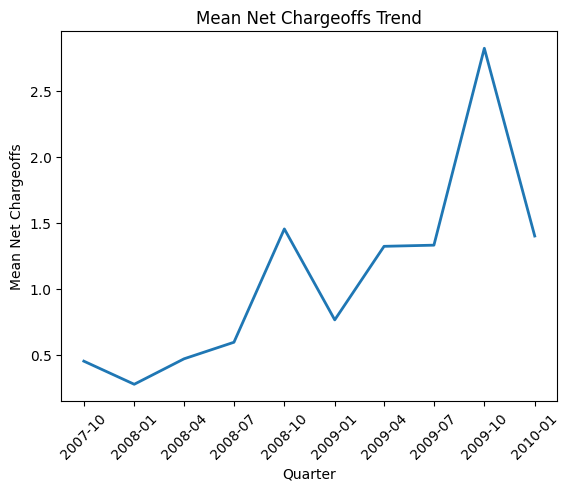

In [ ]:
df['Quarter'] = pd.to_datetime(df['Quarter'])

# Group the data by Quarter and calculate the mean of Net Chargeoffs
df_mean = df.groupby('Quarter')['Net Chargeoffs'].mean().reset_index()

# Plotting the mean net chargeoffs over time
plt.plot(df_mean['Quarter'], df_mean['Net Chargeoffs'], linewidth=2)
plt.xlabel('Quarter')
plt.ylabel('Mean Net Chargeoffs')
plt.title('Mean Net Chargeoffs Trend')
plt.xticks(rotation=45)
plt.show()



In [ ]:
#Question2:
#Ans: There are two peaks in an upward trend followed by a steep fall in 2009Q4 as can be seen from the graph below


Is there a correlation between level of profitability of a bank’s investments in securities (here measured by fair value of investments over cost basis) and bank failure?

In [ ]:
df.head()

,Bank Name,Quarter,Tier One,Texas,Size,Brokered Deposits,Net Chargeoffs,Constr and Land Dev Loans,Change in Portfolio Mix,NP CRE to Assets,Volatile Liabilities to Assets,Securities,Failed during 2010Q2,Cert Number
0,Exchange Bank,2007-10-01,14.90,19.36,32.852108,0.0,0.03,23.13,3.38,0.190681,20.16,99.07,NaN,160
1,Exchange Bank,2008-01-01,14.30,20.86,33.542390,0.0,0.00,32.96,4.96,0.000000,21.23,99.45,NaN,160
2,Exchange Bank,2008-04-01,14.15,20.89,34.140007,0.0,0.31,33.71,1.53,0.022408,19.69,97.94,NaN,160
3,Exchange Bank,2008-07-01,14.13,18.74,34.038758,0.0,-0.02,34.99,3.80,0.147452,19.83,98.84,NaN,160
4,Exchange Bank,2008-10-01,14.21,21.82,34.059328,0.0,1.21,37.14,3.86,0.057306,15.29,99.84,NaN,160


In [ ]:

df_corr=df.copy()
df["Quarter"]=pd.to_datetime(df['Quarter'])
df['Failed during 2010Q2']=df['Failed during 2010Q2'].map({'Yes': 1, 'No': 0})
correlation=df_corr.corr()
correlation


<ipython-input-170-8431c93996f0>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation=df_corr.corr()


,Tier One,Texas,Size,Brokered Deposits,Net Chargeoffs,Constr and Land Dev Loans,Change in Portfolio Mix,NP CRE to Assets,Volatile Liabilities to Assets,Securities,Failed during 2010Q2,Cert Number
Tier One,1.000000,-0.155485,-0.287841,-0.149923,-0.101895,-0.192658,-0.011085,-0.156345,-0.272009,0.071144,-0.151887,0.037668
Texas,-0.155485,1.000000,0.174833,0.190586,0.472153,0.245331,-0.011879,0.417465,0.157518,-0.116708,0.438105,0.048251
Size,-0.287841,0.174833,1.000000,0.374421,0.127341,0.318216,-0.116782,0.160372,0.230662,-0.136960,0.193238,-0.005495
Brokered Deposits,-0.149923,0.190586,0.374421,1.000000,0.178731,0.311209,0.058475,0.225158,0.271442,-0.105812,0.359349,0.219814
Net Chargeoffs,-0.101895,0.472153,0.127341,0.178731,1.000000,0.174775,0.054802,0.247389,0.135509,-0.036760,0.271446,0.072688
Constr and Land Dev Loans,-0.192658,0.245331,0.318216,0.311209,0.174775,1.000000,0.069266,0.173712,0.273187,-0.129451,0.436790,0.274322
Change in Portfolio Mix,-0.011085,-0.011879,-0.116782,0.058475,0.054802,0.069266,1.000000,-0.044740,0.097003,-0.013419,0.007709,0.194345
NP CRE to Assets,-0.156345,0.417465,0.160372,0.225158,0.247389,0.173712,-0.044740,1.000000,0.165035,-0.052430,0.403992,0.113292
Volatile Liabilities to Assets,-0.272009,0.157518,0.230662,0.271442,0.135509,0.273187,0.097003,0.165035,1.000000,-0.097747,0.195391,0.299081
Securities,0.071144,-0.116708,-0.136960,-0.105812,-0.036760,-0.129451,-0.013419,-0.052430,-0.097747,1.000000,-0.154223,-0.015462


The given table represents a correlation matrix that shows the correlation coefficients between different variables. Each cell in the table represents the correlation between two variables.

Here's an explanation of the correlation matrix:

Each variable is listed in both rows and columns, and the diagonal cells have a correlation of 1 because they represent the correlation of a variable with itself.

The correlation coefficient ranges from -1 to 1. A value close to 1 indicates a strong positive correlation, while a value close to -1 indicates a strong negative correlation. A value close to 0 suggests no significant linear correlation.

For example, looking at the first row:
The correlation coefficient between 'Tier One' and 'Tier One' is 1 (since it's the correlation of a variable with itself).

The correlation coefficient between 'Tier One' and 'Texas' is -0.155485, indicating a weak negative correlation between these two variables.

The correlation coefficient between 'Tier One' and 'Size' is -0.287841, indicating a slightly stronger negative correlation between these two variables.
Similarly, we can interpret the correlations between other variables based on the corresponding values in the table.

<Axes: >

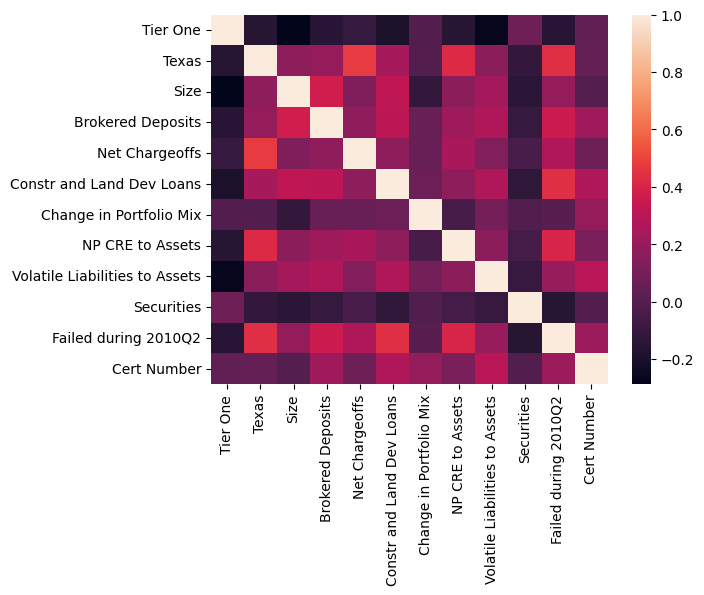

In [ ]:
sns.heatmap(correlation)

 What are the top two predictors of bank failure?

In [ ]:
failed_corr=correlation['Failed during 2010Q2']
sorted_corr = failed_corr.sort_values(ascending=False)
top_predictors = sorted_corr[1:3]
print("Top Predictors of Bank Failure:")
print(top_predictors)

Top Predictors of Bank Failure:
Texas                        0.438105
Constr and Land Dev Loans    0.436790
Name: Failed during 2010Q2, dtype: float64


Which banks are most likely to fail in the near future (and why)?

,Bank Name,Quarter,Tier One,Texas,Size,Brokered Deposits,Net Chargeoffs,Constr and Land Dev Loans,Change in Portfolio Mix,NP CRE to Assets,Volatile Liabilities to Assets,Securities,Failed during 2010Q2,Cert Number
0,Exchange Bank,2007-10-01,14.90,19.36,32.852108,0.00,0.03,23.13,3.38,0.190681,20.16,99.07,NaN,160
1,Exchange Bank,2008-01-01,14.30,20.86,33.542390,0.00,0.00,32.96,4.96,0.000000,21.23,99.45,NaN,160
2,Exchange Bank,2008-04-01,14.15,20.89,34.140007,0.00,0.31,33.71,1.53,0.022408,19.69,97.94,NaN,160
3,Exchange Bank,2008-07-01,14.13,18.74,34.038758,0.00,-0.02,34.99,3.80,0.147452,19.83,98.84,NaN,160
4,Exchange Bank,2008-10-01,14.21,21.82,34.059328,0.00,1.21,37.14,3.86,0.057306,15.29,99.84,NaN,160
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4055,Bank of Little Rock,2009-01-01,11.56,63.22,30.615074,21.89,-0.01,18.92,5.15,0.632576,29.70,100.91,NaN,91280
4056,Bank of Little Rock,2009-04-01,11.37,68.27,31.262391,15.29,0.18,18.64,7.58,0.291522,23.10,98.69,NaN,91280
4057,Bank of Little Rock,2009-07-01,11.21,67.34,32.244126,10.92,1.80,17.33,7.11,0.162665,20.06,100.33,NaN,91280
4058,Bank of Little Rock,2009-10-01,10.93,64.60,32.098071,7.63,3.26,15.86,4.59,0.905474,14.83,99.64,NaN,91280


In [204]:
df=pd.read_excel('/content/Bank failure data.xlsx')
df_model=df.copy()


In [205]:
df_model['Failed during 2010Q2'] = df_model['Failed during 2010Q2'].map({'Yes':'1','No':'0'})
df_model.head()


,Bank Name,Quarter,Tier One,Texas,Size,Brokered Deposits,Net Chargeoffs,Constr and Land Dev Loans,Change in Portfolio Mix,NP CRE to Assets,Volatile Liabilities to Assets,Securities,Failed during 2010Q2,Cert Number
0,Exchange Bank,2007Q4,14.90,19.36,32.852108,0.0,0.03,23.13,3.38,0.190681,20.16,99.07,0,160
1,Exchange Bank,2008Q1,14.30,20.86,33.542390,0.0,0.00,32.96,4.96,0.000000,21.23,99.45,0,160
2,Exchange Bank,2008Q2,14.15,20.89,34.140007,0.0,0.31,33.71,1.53,0.022408,19.69,97.94,0,160
3,Exchange Bank,2008Q3,14.13,18.74,34.038758,0.0,-0.02,34.99,3.80,0.147452,19.83,98.84,0,160
4,Exchange Bank,2008Q4,14.21,21.82,34.059328,0.0,1.21,37.14,3.86,0.057306,15.29,99.84,0,160


In [206]:
df_model = df_model.fillna(df_model.mean())

<ipython-input-206-62505750bb5f>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_model = df_model.fillna(df_model.mean())


In [207]:
X = df_model[['Tier One', 'Texas', 'Size', 'Brokered Deposits', 'Net Chargeoffs', 'Constr and Land Dev Loans',
        'Change in Portfolio Mix', 'NP CRE to Assets', 'Volatile Liabilities to Assets', 'Securities']]
y = df_model['Failed during 2010Q2']

In [208]:
X.isna().sum()

Tier One                          0
Texas                             0
Size                              0
Brokered Deposits                 0
Net Chargeoffs                    0
Constr and Land Dev Loans         0
Change in Portfolio Mix           0
NP CRE to Assets                  0
Volatile Liabilities to Assets    0
Securities                        0
dtype: int64

In [209]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [210]:
rfc=RandomForestClassifier(n_estimators=200)

In [211]:
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=200)

In [213]:
rfc.score(X_test,y_test)

0.9753694581280788

In [214]:
y_preds=rfc.predict(X_test)

In [216]:
print(confusion_matrix(y_test,y_preds))

[[726   2]
 [ 18  66]]


In [217]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       728
           1       0.97      0.79      0.87        84

    accuracy                           0.98       812
   macro avg       0.97      0.89      0.93       812
weighted avg       0.98      0.98      0.97       812



<Axes: >

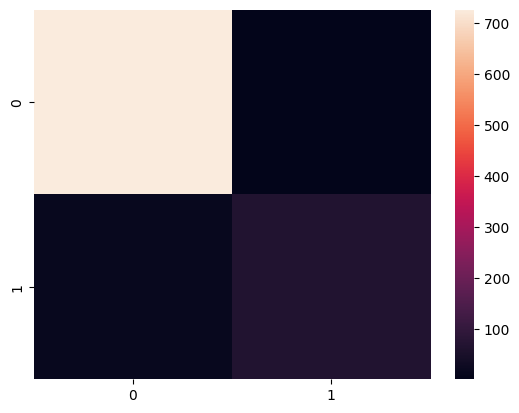

In [220]:
cn=confusion_matrix(y_test,y_preds)
sns.heatmap(cn)

In [222]:
X_test.head(7)

,Tier One,Texas,Size,Brokered Deposits,Net Chargeoffs,Constr and Land Dev Loans,Change in Portfolio Mix,NP CRE to Assets,Volatile Liabilities to Assets,Securities
3285,12.30,0.38,37.497124,0.00,1.20,4.16,2.81,0.000000,11.45,99.89
2718,16.24,25.10,43.280006,3.11,1.80,7.15,3.86,2.725443,48.13,99.26
4057,11.21,67.34,32.244126,10.92,1.80,17.33,7.11,0.162665,20.06,100.33
746,19.45,8.82,27.852008,0.00,0.30,1.67,2.66,0.322975,14.83,99.42
1979,21.86,0.00,16.207536,0.00,0.54,0.13,2.67,0.000000,10.00,101.98
534,15.53,14.12,22.781604,0.00,1.67,5.68,4.47,0.237978,11.64,102.67
166,17.66,9.07,21.713760,0.00,0.06,6.93,3.25,0.064967,14.25,101.26


In [225]:
y_preds[:7]

array(['0', '0', '0', '0', '0', '0', '0'], dtype=object)

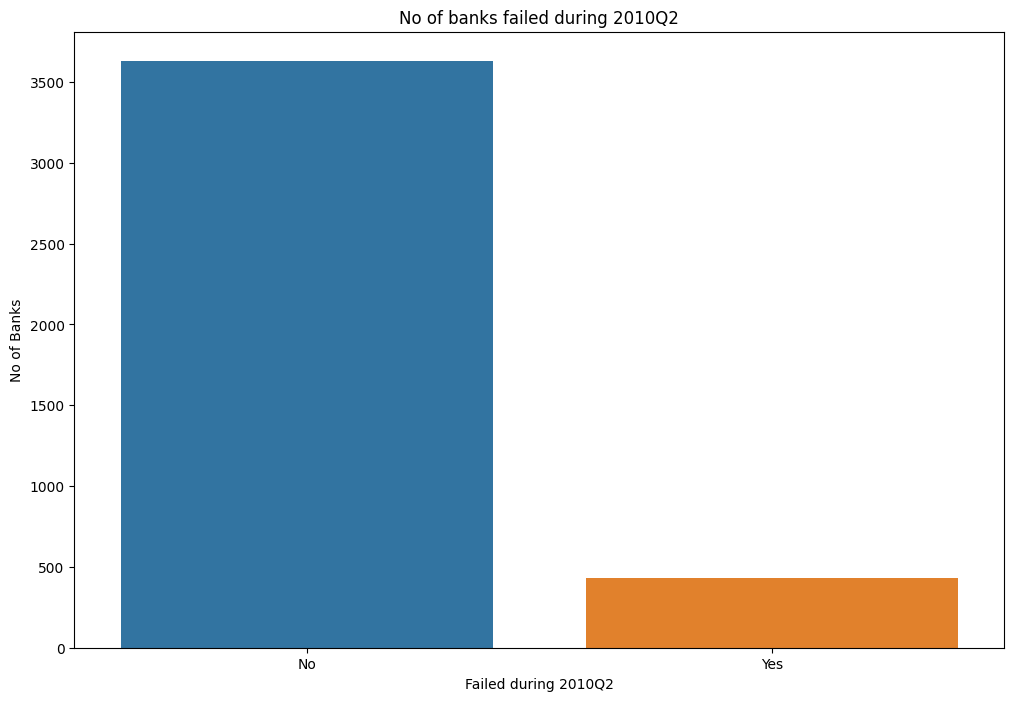

In [ ]:

plt.figure(figsize=(12,8))
plot=sns.countplot(x='Failed during 2010Q2',data=df)
plt.xlabel("Failed during 2010Q2")
plt.ylabel("No of Banks")
plt.title("No of banks failed during 2010Q2")
plt.show()

In [ ]:
#percentage of failed bank

In [ ]:
failed=df[df['Failed during 2010Q2']=="Yes"]
not_failed=df[df['Failed during 2010Q2']=="No"]

In [ ]:

len(failed)

430

In [ ]:
failed_percentage=round((len(failed)/df['Failed during 2010Q2'].count()*100),2)
failed_percentage

10.59

In [ ]:
not_failed_percentage=round((len(not_failed)/df['Failed during 2010Q2'].count()*100),2)
not_failed_percentage

89.41

In [ ]:
d={'Class':['Bank failed','Bank not failed'],'Percentage':[failed_percentage,not_failed_percentage]}
df_percentage=pd.DataFrame(d)
df_percentage

,Class,Percentage
0,Bank failed,10.59
1,Bank not failed,89.41


<Axes: xlabel='Class', ylabel='Percentage'>

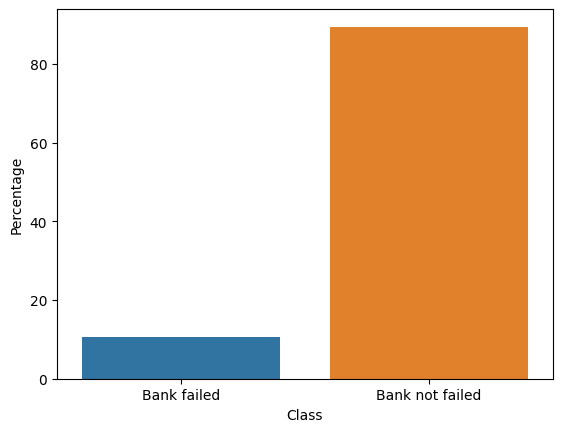

In [ ]:
sns.barplot(x='Class',y="Percentage",data=df_percentage)

In [228]:
X_train


,Tier One,Texas,Size,Brokered Deposits,Net Chargeoffs,Constr and Land Dev Loans,Change in Portfolio Mix,NP CRE to Assets,Volatile Liabilities to Assets,Securities
1436,16.77,1.25,22.665648,1.82,0.21,1.90,3.02,0.369480,15.82,100.79
3361,10.56,1.28,29.712736,1.46,0.02,16.09,3.82,0.087463,31.85,100.87
436,12.73,6.06,35.611219,3.07,0.53,10.71,4.26,0.018816,25.56,99.95
3488,10.00,22.01,30.375134,4.56,0.41,17.66,3.48,0.661339,39.02,101.74
3654,13.46,37.34,33.187754,6.54,2.29,35.30,7.88,0.551808,22.75,100.73
...,...,...,...,...,...,...,...,...,...,...
1130,20.70,9.10,19.421523,0.00,0.06,0.00,3.06,0.344355,6.32,101.16
1294,13.61,0.00,4.765995,0.00,0.00,1.30,7.48,0.000000,18.20,100.79
860,10.85,28.29,14.595267,5.52,-0.48,1.02,1.05,1.128957,24.87,100.71
3507,2.98,96.74,39.470305,16.53,8.53,31.79,2.68,0.800209,28.35,98.63


In [231]:
make_train = df["Bank Name"].str.split(" ", expand = True)
make_test = df["Bank Name"].str.split(" ", expand = True)

In [249]:
df["Bank Name"] = make_train[1]
df["Bank Name"] = make_test[1]
     

Text(0, 0.5, 'Count of Banks')

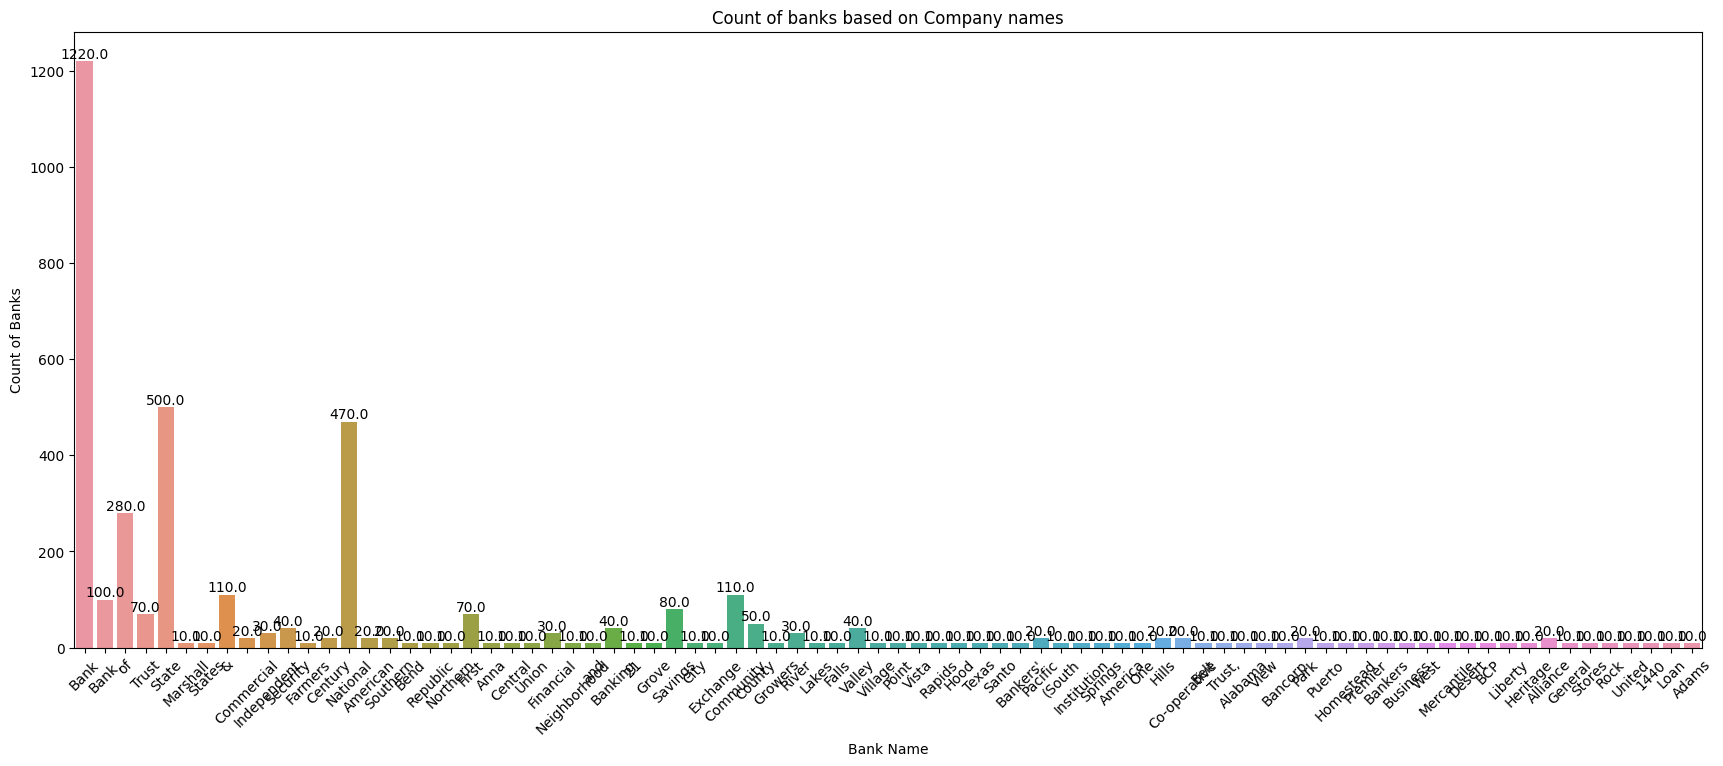

In [250]:
plt.figure(figsize = (21, 8))
plot = sns.countplot(x = 'Bank Name', data = df)
plt.xticks(rotation = 90)
for p in plot.patches:
    plot.annotate(p.get_height(), 
                        (p.get_x() + p.get_width() / 2.0, 
                         p.get_height()), 
                        ha = 'center', 
                        va = 'center', 
                        xytext = (0, 5),
                        textcoords = 'offset points')
plt.xticks(rotation=45)
plt.title("Count of banks based on Company names")
plt.xlabel("Bank Name")
plt.ylabel("Count of Banks")